In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import StepPatch

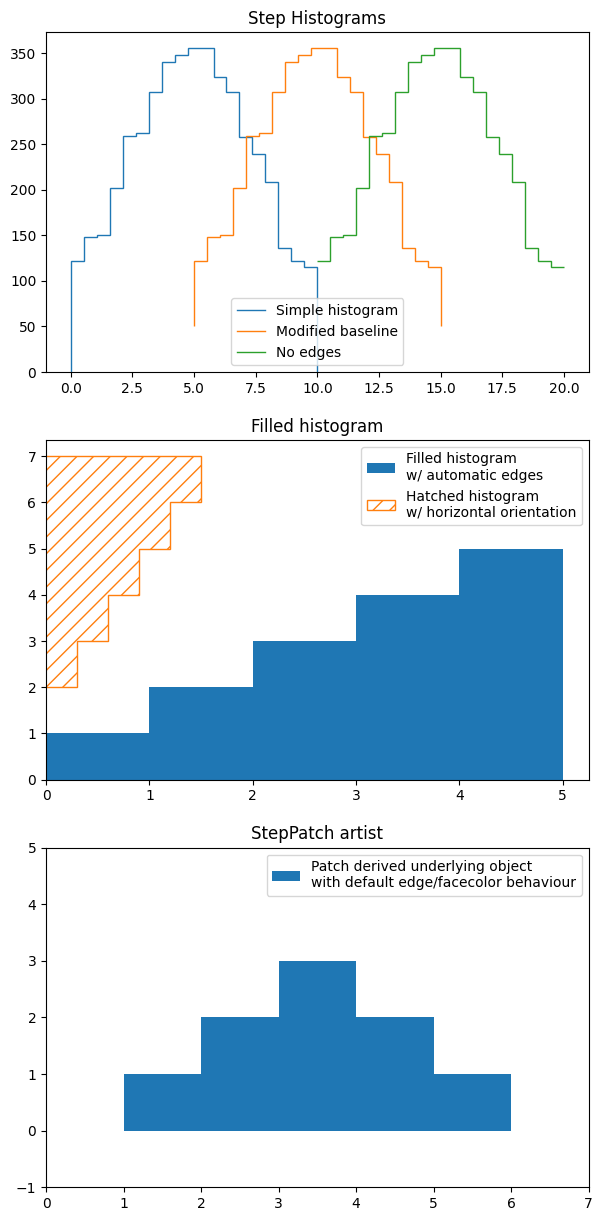

In [ ]:


np.random.seed(0)
h, edges = np.histogram(np.random.normal(5, 3, 5000),
                        bins=np.linspace(0, 10, 20))

fig, axs = plt.subplots(3, 1, figsize=(7, 15))

axs[0].stairs(h, edges, label='Simple histogram')
axs[0].stairs(h, edges + 5, baseline=50, label='Modified baseline')
axs[0].stairs(h, edges + 10, baseline=None, label='No edges')
axs[0].set_title("Step Histograms")




axs[1].stairs(np.arange(1, 6, 1), fill=True,
              label='Filled histogram\nw/ automatic edges')
axs[1].stairs(np.arange(1, 6, 1)*0.3, np.arange(2, 8, 1),
              orientation='horizontal', hatch='//',
              label='Hatched histogram\nw/ horizontal orientation')
axs[1].set_title("Filled histogram")




patch = StepPatch(values=[1, 2, 3, 2, 1],
                  edges=range(1, 7),
                  label=('Patch derived underlying object\n'
                         'with default edge/facecolor behaviour'))
axs[2].add_patch(patch)
axs[2].set_xlim(0, 7)
axs[2].set_ylim(-1, 5)
axs[2].set_title("StepPatch artist")

for ax in axs:
    ax.legend()
plt.show()

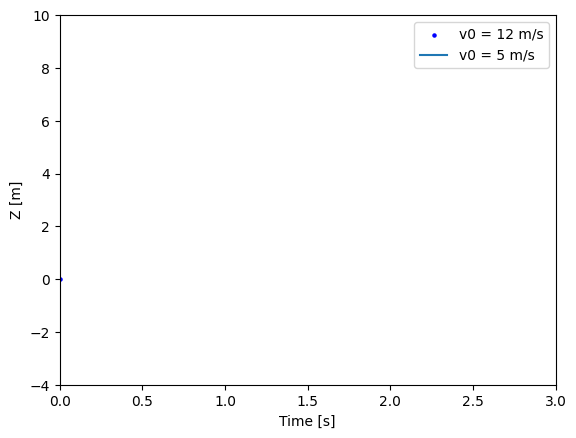

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()